In [ ]:
pip install lifelines

In [ ]:
import lifelines
import numpy as np
import pandas as pd
from lifelines import CoxPHFitter

In [ ]:
df = pd.read_csv('training_data_bad_modified.csv')

In [ ]:
def get_time(snapshot, mthcode):
    snapshot = str(snapshot)
    mthcode = str(mthcode)
    x1 = int(snapshot[0:4])
    x2 = int(snapshot[4:6])
    y1 = int(mthcode[0:4])
    y2 = int(mthcode[4:6])
    time = (y1 - x1)*(12) - x2 + y2
    return time

df['time'] = df.apply(lambda row: get_time(row['snapshot'], row['mth_code']), axis=1)

In [ ]:
df['time'] = df['time'].astype('float32')
df['charge_off'] = df['charge_off'].astype('float32')

In [ ]:
df['time'] = df['time'].to_frame()
df['charge_off'] = df['charge_off'].to_frame()

In [ ]:
df1 = pd.DataFrame(df["time"], df["charge_off"], columns=['time', 'charge_off'])
df2 = pd.DataFrame()
df2["time"] = df['time']
df2['charge_off'] = df["charge_off"]
df2['promotion_flag'] = df['promotion_flag']
df2['variable_rate_index'] = df['variable_rate_index']
df2.head()

In [ ]:
cph = CoxPHFitter()
cph.fit(df2, duration_col='time', event_col='charge_off')

cph.print_summary()

In [ ]:
cph.plot()

<Axes: >

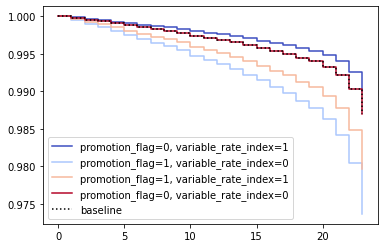

In [ ]:
cph.plot_partial_effects_on_outcome(covariates=['promotion_flag', 'variable_rate_index'], values=[[0,1],[1,0],[1,1],[0,0]], cmap='coolwarm')